In [90]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [91]:
calibration = cv2.imread("calibration.bmp", 1)
hoge = cv2.imread("hoge.bmp", 0)

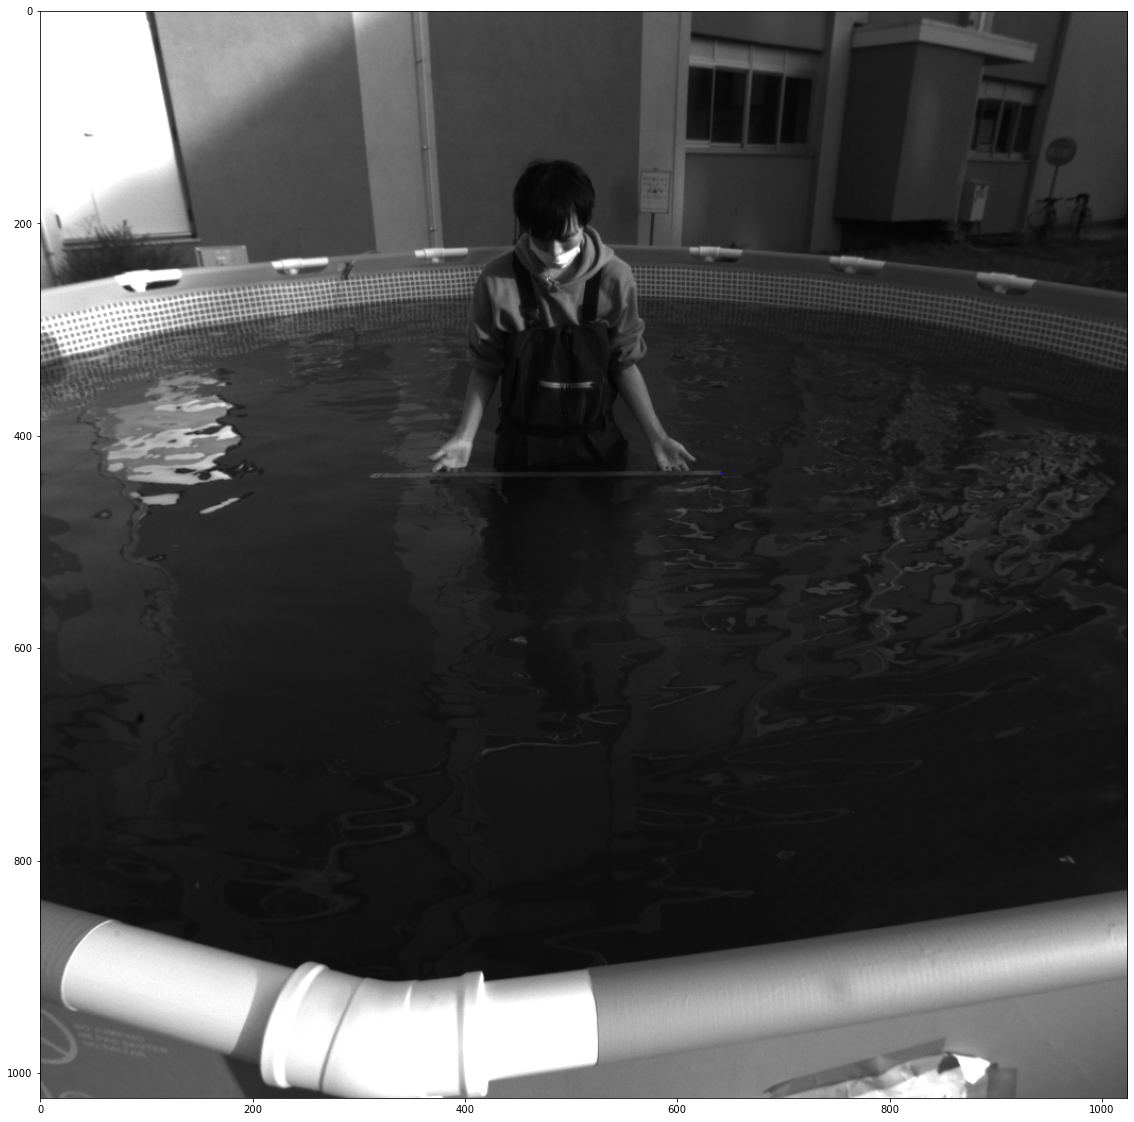

In [92]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(calibration, cmap='gray')

In [93]:
p_original = np.float32([[312, 437], [640, 434], [242, 534], [678, 533], ])
p_trans = np.float32([[800, 1100], [1320, 1100], [800, 1375], [1320, 1375]])
M = cv2.getPerspectiveTransform(p_original, p_trans)

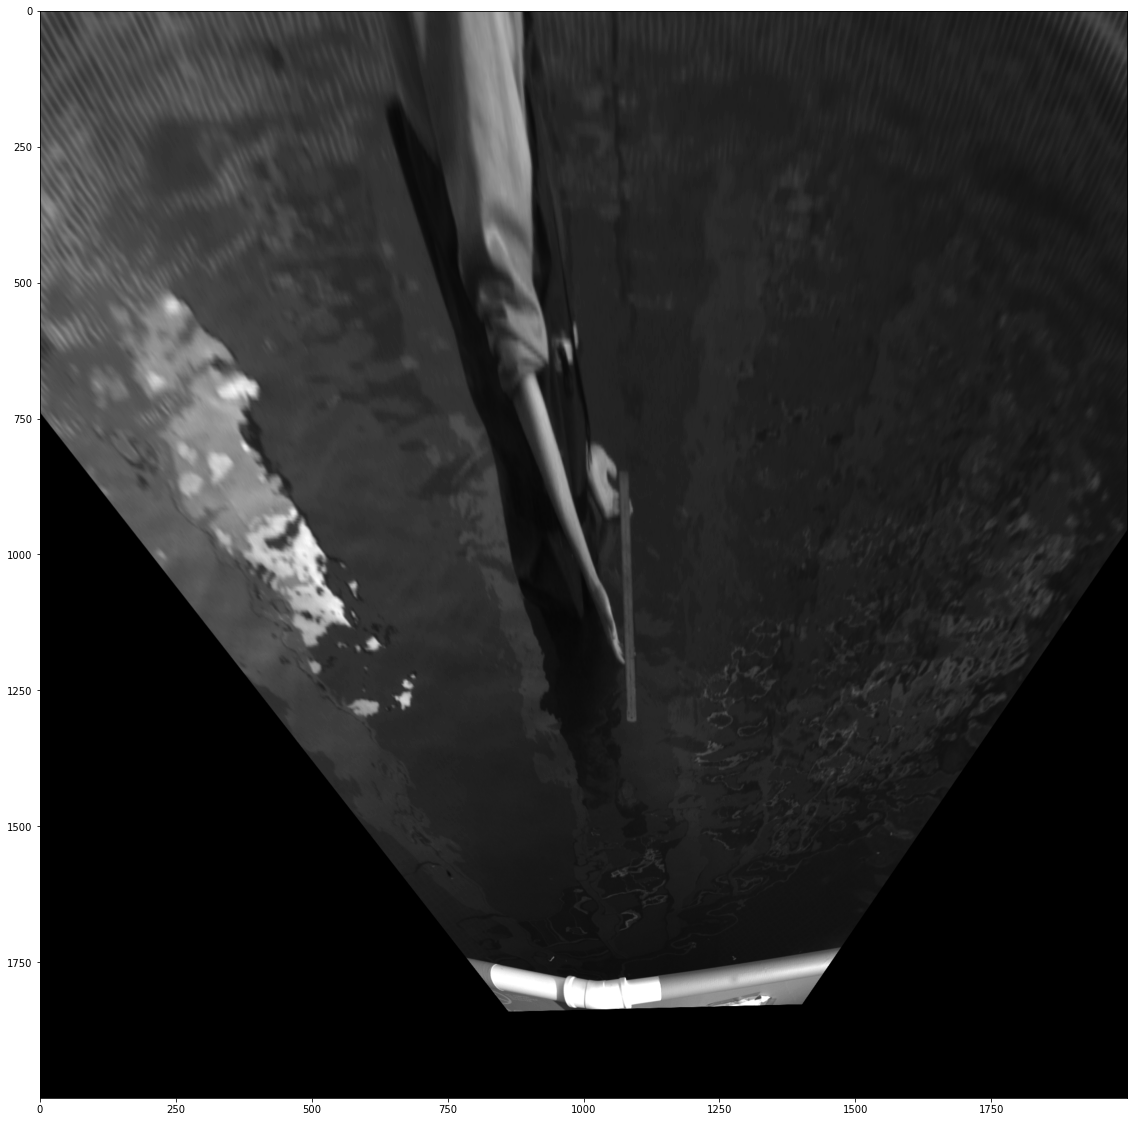

In [94]:
hoge_trans = cv2.warpPerspective(hoge, M, (2000, 2000))
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(hoge_trans, cmap='gray')

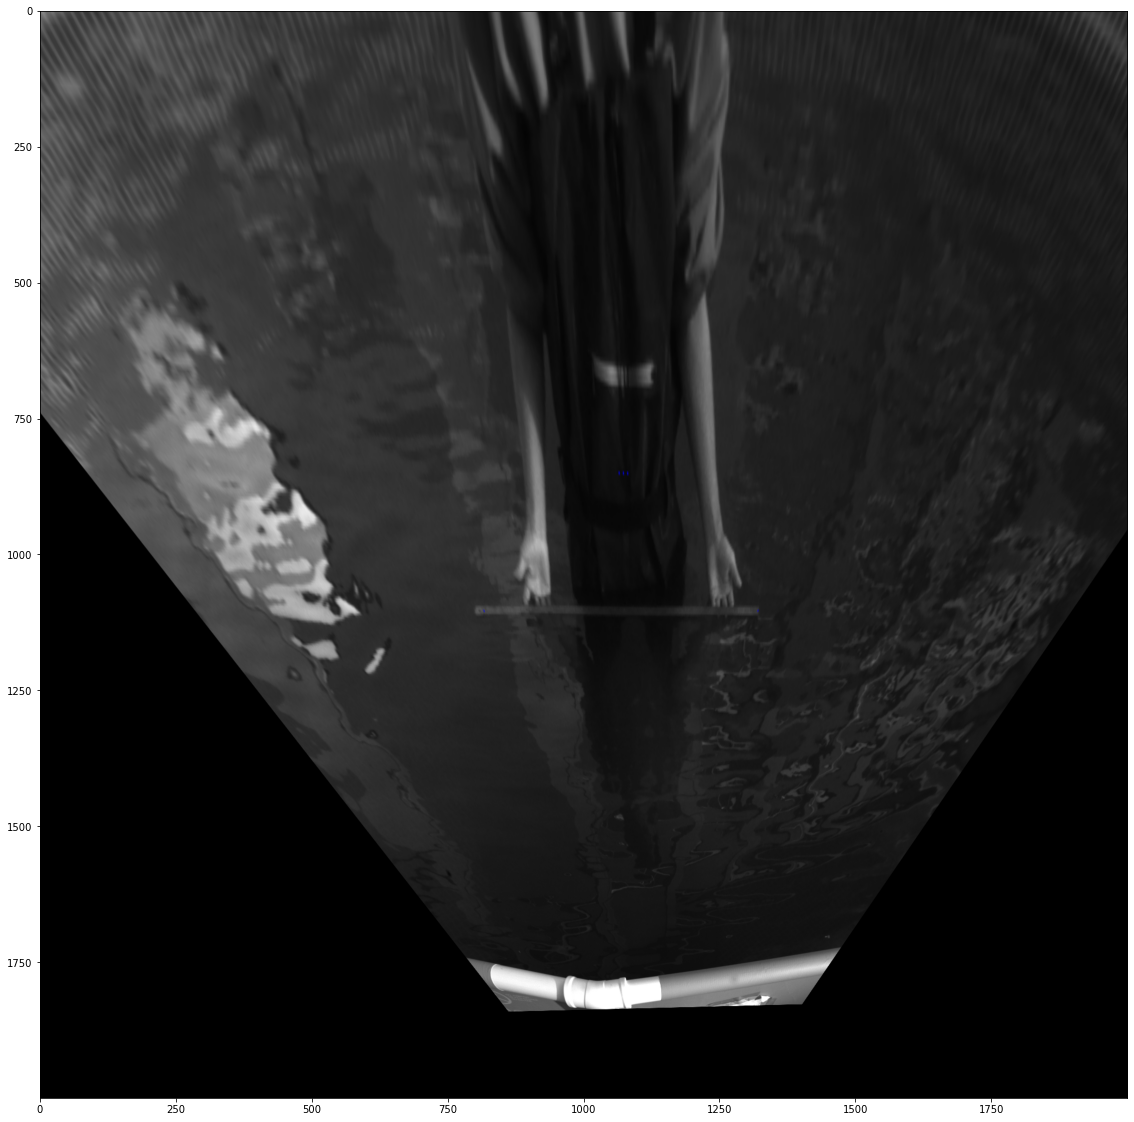

In [95]:
calibration_trans = cv2.warpPerspective(calibration, M, (2000, 2000))
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(calibration_trans, cmap='gray')

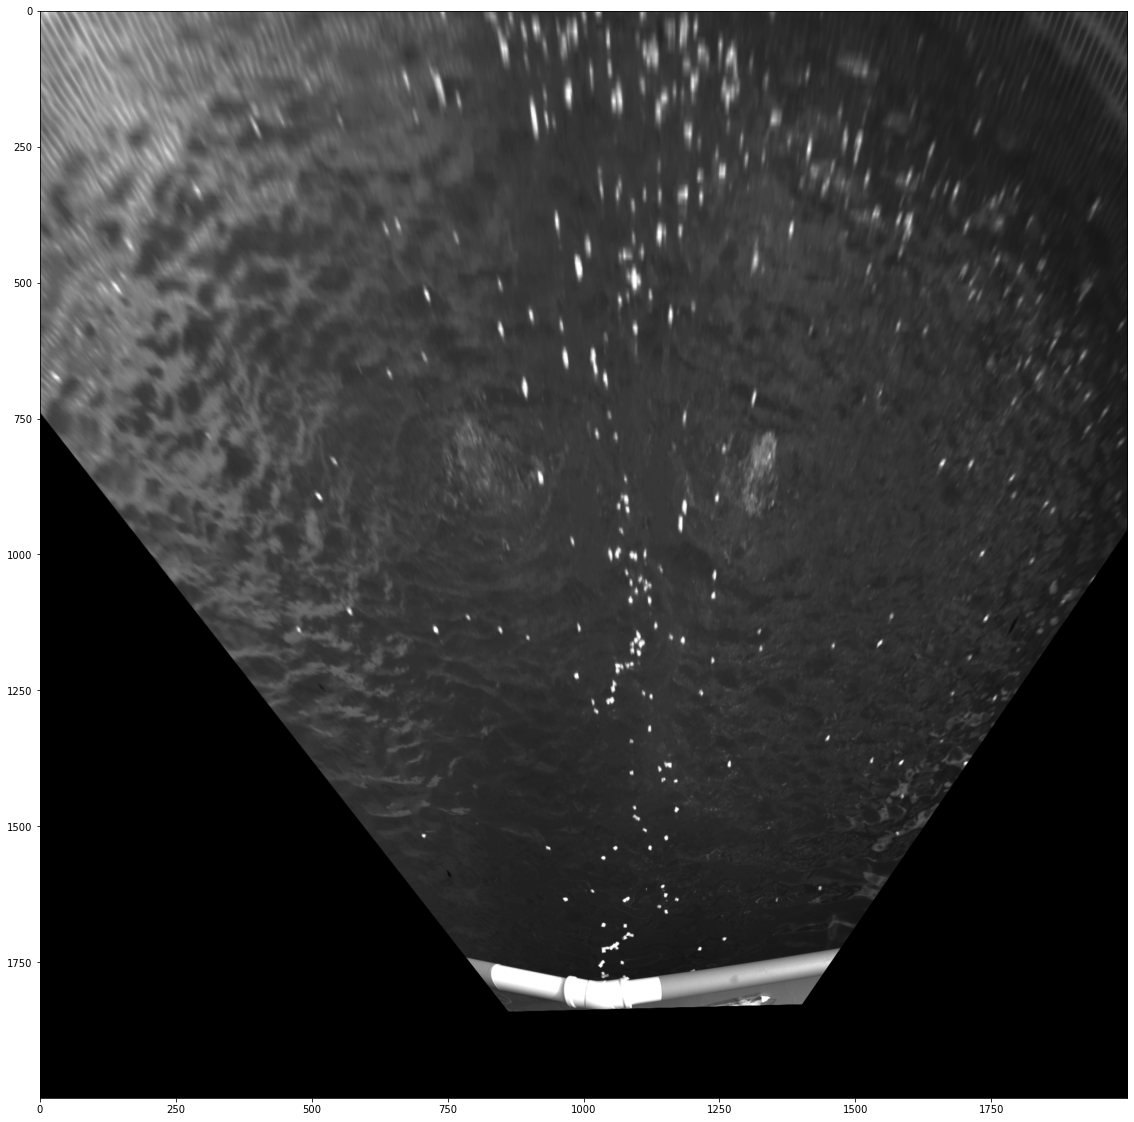

In [96]:
fuga = cv2.imread("fuga.bmp", 0)
fuga_trans = cv2.warpPerspective(fuga, M, (2000, 2000))
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(fuga_trans, cmap='gray')

In [97]:
_, fuga_trans_th = cv2.threshold(fuga_trans[:, :], 180, 255, cv2.THRESH_BINARY)

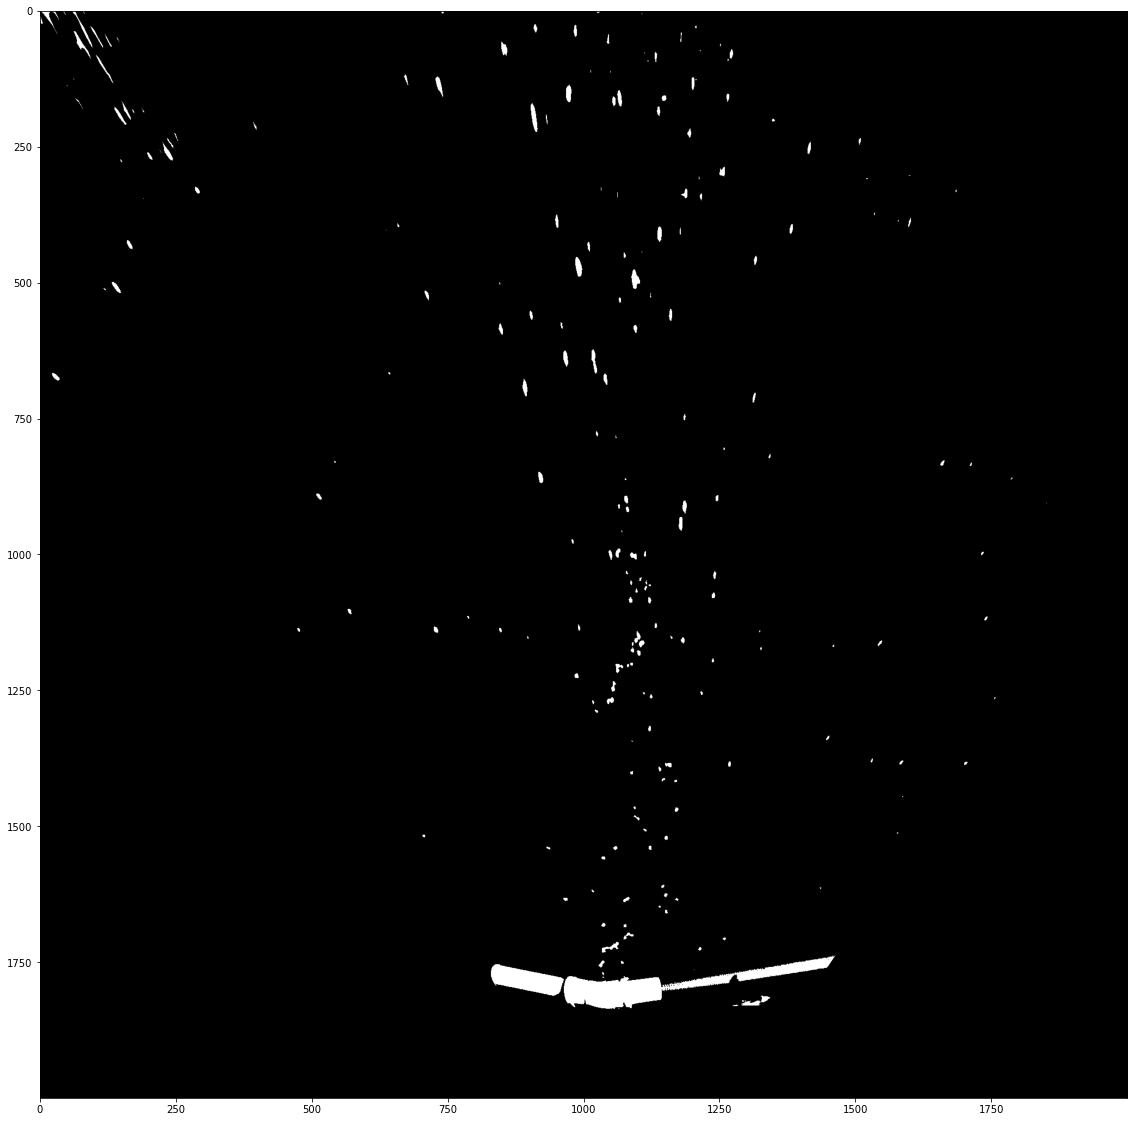

In [98]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(fuga_trans_th, cmap='gray')

In [99]:
fuga_trans_th[:600, :] = 125
fuga_trans_th[1700:, :] = 125

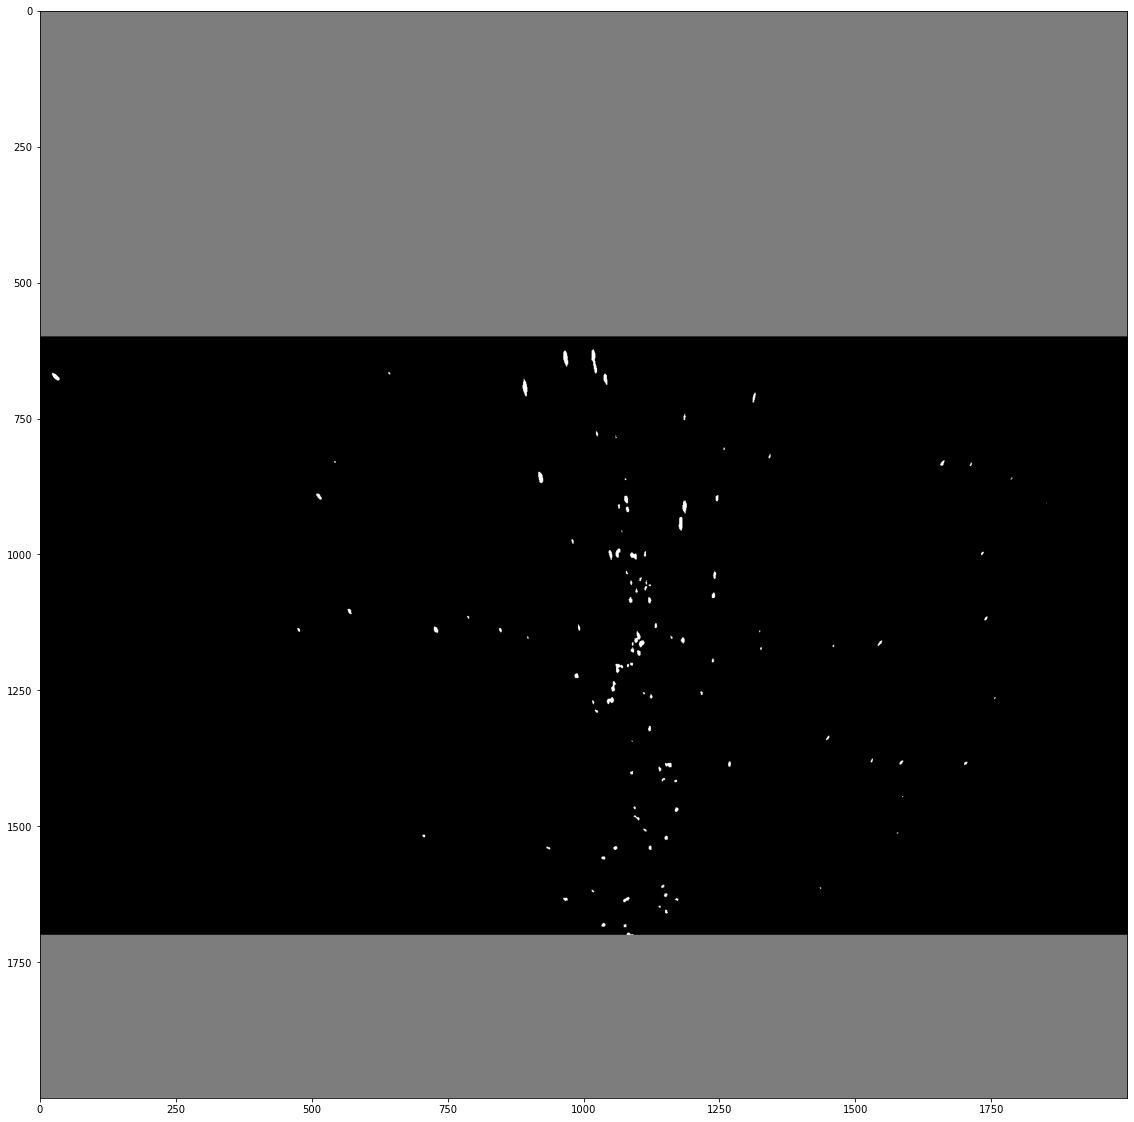

In [100]:
_, ax = plt.subplots(figsize=(20, 20))
ax.imshow(fuga_trans_th, cmap='gray')